In [10]:
import os
import cv2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix,classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras import layers, models

In [11]:
data_dir='C:\\Users\\Sreerag\\Data Science\\Internship\\Datasets\\Facial_expressions\\images'
emotions=['Anger', 'Contempt', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprised']
img_size=48

In [12]:
def load_data():
    images=[]
    labels=[]
    
    for emotion_label,emotion in enumerate(emotions):
        emotion_dir=os.path.join(data_dir,str(emotion_label))
        if os.path.isdir(emotion_dir):
            for image_file in os.listdir(emotion_dir):
                image_path=os.path.join(emotion_dir,image_file)
                image_array = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                image_resized = cv2.resize(image_array, (img_size, img_size))
                images.append(image_resized)
                labels.append(emotion_label)
        else:
            print(f"Directory not found for emotion {emotion}: {emotion_dir}")
        
    return np.array(images), np.array(labels)

images, labels = load_data()

In [13]:
x_train, x_test, y_train, y_test=train_test_split(images,labels,test_size=0.2,random_state=42)

x_train=x_train/255
x_test=x_test/255

In [14]:
x_train=x_train.reshape(-1,img_size,img_size,1)
x_test=x_test.reshape(-1,img_size,img_size,1)

In [15]:
print("Number of images:", len(images))
print("Shape of images array:", images.shape)
print("Number of labels:", len(labels))

Number of images: 64
Shape of images array: (64, 48, 48)
Number of labels: 64


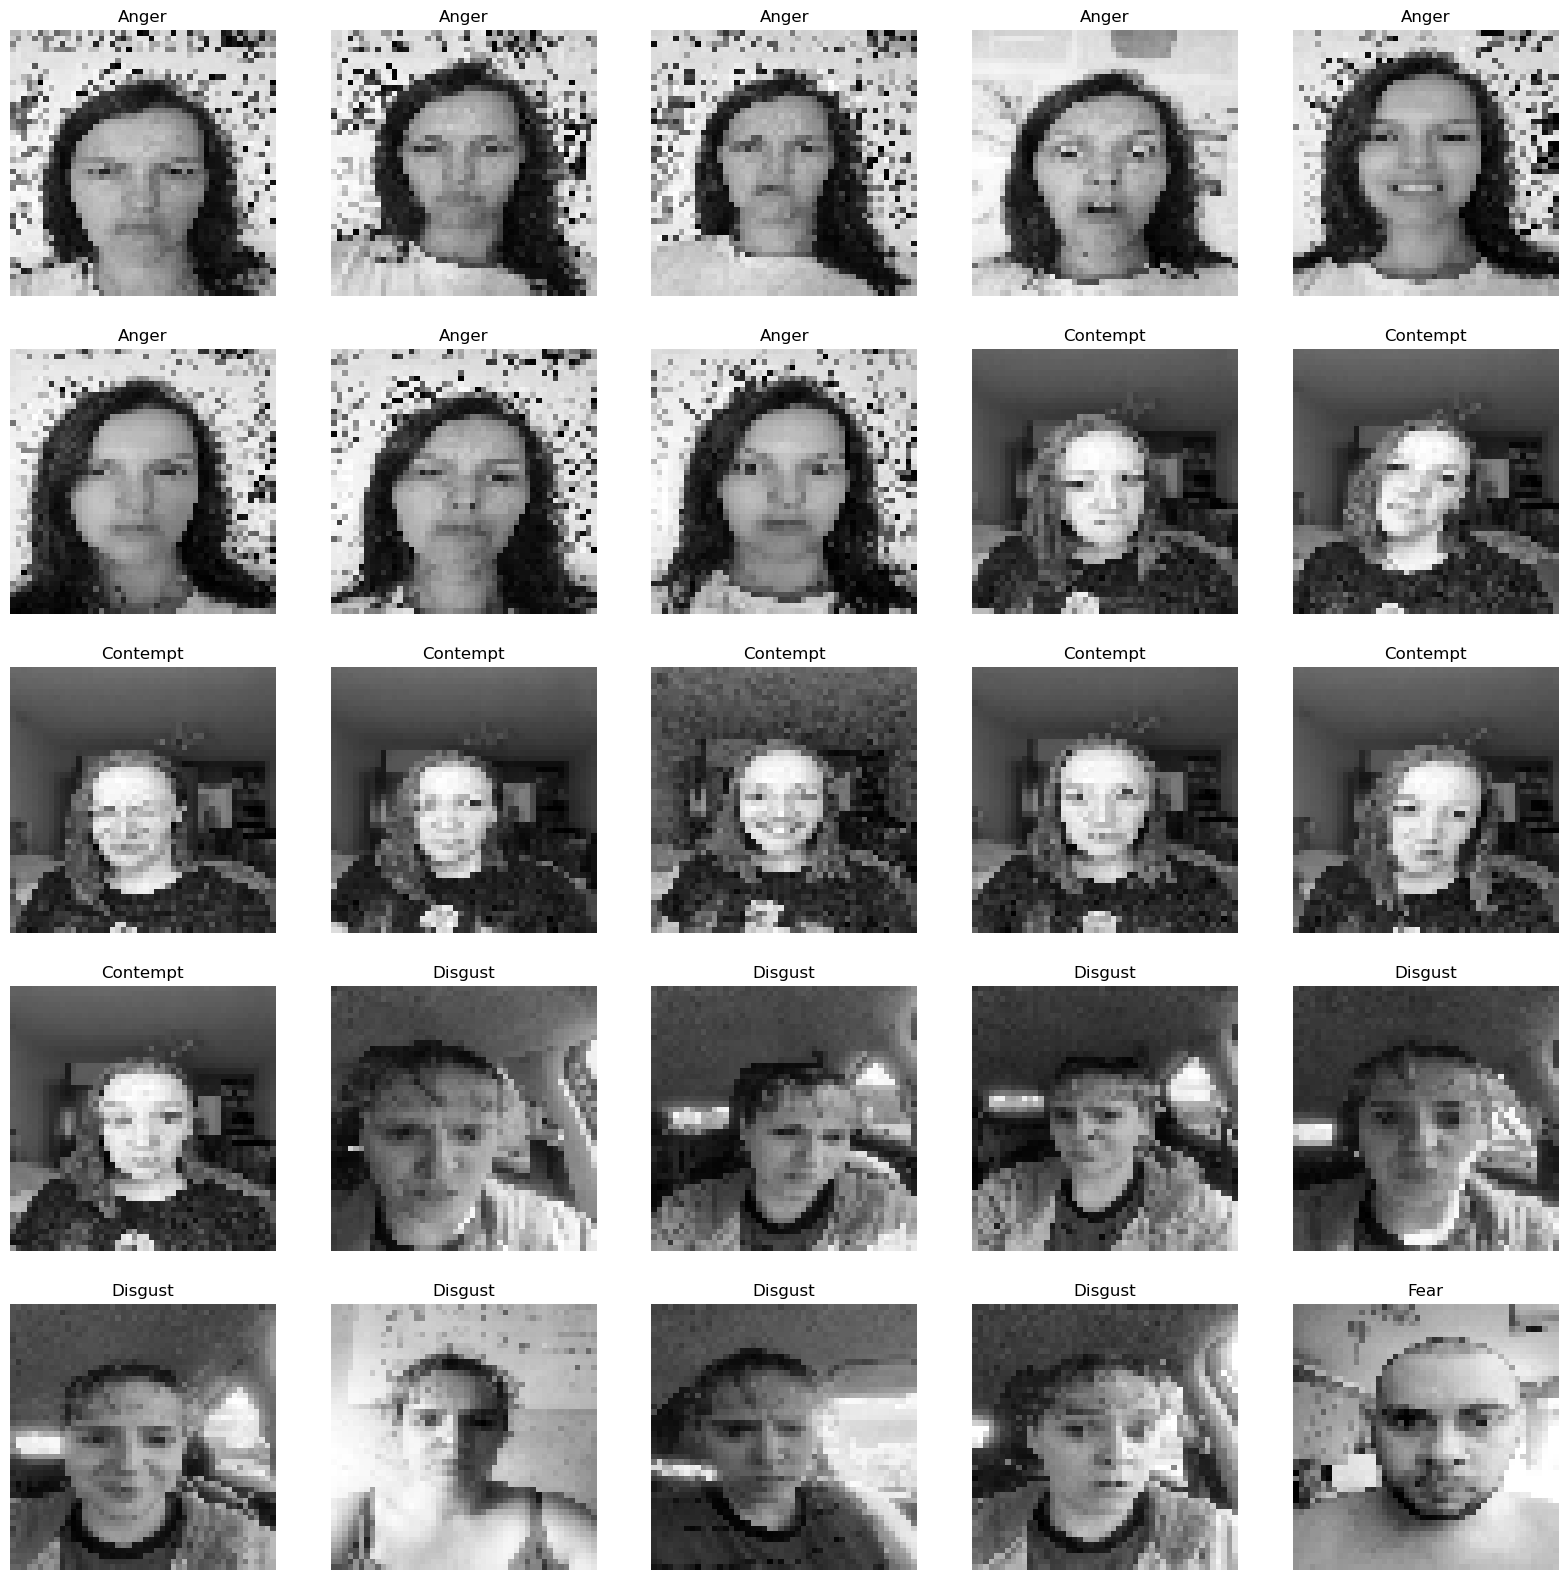

In [16]:
plt.figure(figsize=(20, 20))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(emotions[labels[i]])
    plt.axis('off')
plt.show()

In [17]:
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

In [18]:
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(img_size, img_size, 1)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(emotions), activation='softmax')
])

C:\Users\Sreerag\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │           1,032 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 485,384 (1.85 MB)

 Trainable params: 485,384 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=50, validation_data=(x_test, y_test))

Epoch 1/50


C:\Users\Sreerag\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 558ms/step - accuracy: 0.1004 - loss: 2.1000 - val_accuracy: 0.0769 - val_loss: 2.0963
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.1441 - loss: 2.0922 - val_accuracy: 0.0769 - val_loss: 2.0895
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.2666 - loss: 2.0272 - val_accuracy: 0.0769 - val_loss: 2.0989
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.1097 - loss: 2.0422 - val_accuracy: 0.0769 - val_loss: 2.1080
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.1332 - loss: 2.0867 - val_accuracy: 0.0769 - val_loss: 2.1055
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.1486 - loss: 2.0402 - val_accuracy: 0.0769 - val_loss: 2.1115
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.2752 - loss: 2.0068 - val_accuracy: 0.0769 - val_loss: 2.0773
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.2036 - loss: 1.9686 - val_accuracy: 0.0769 - val_loss: 2.0299
Epoch 9/5

In [22]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

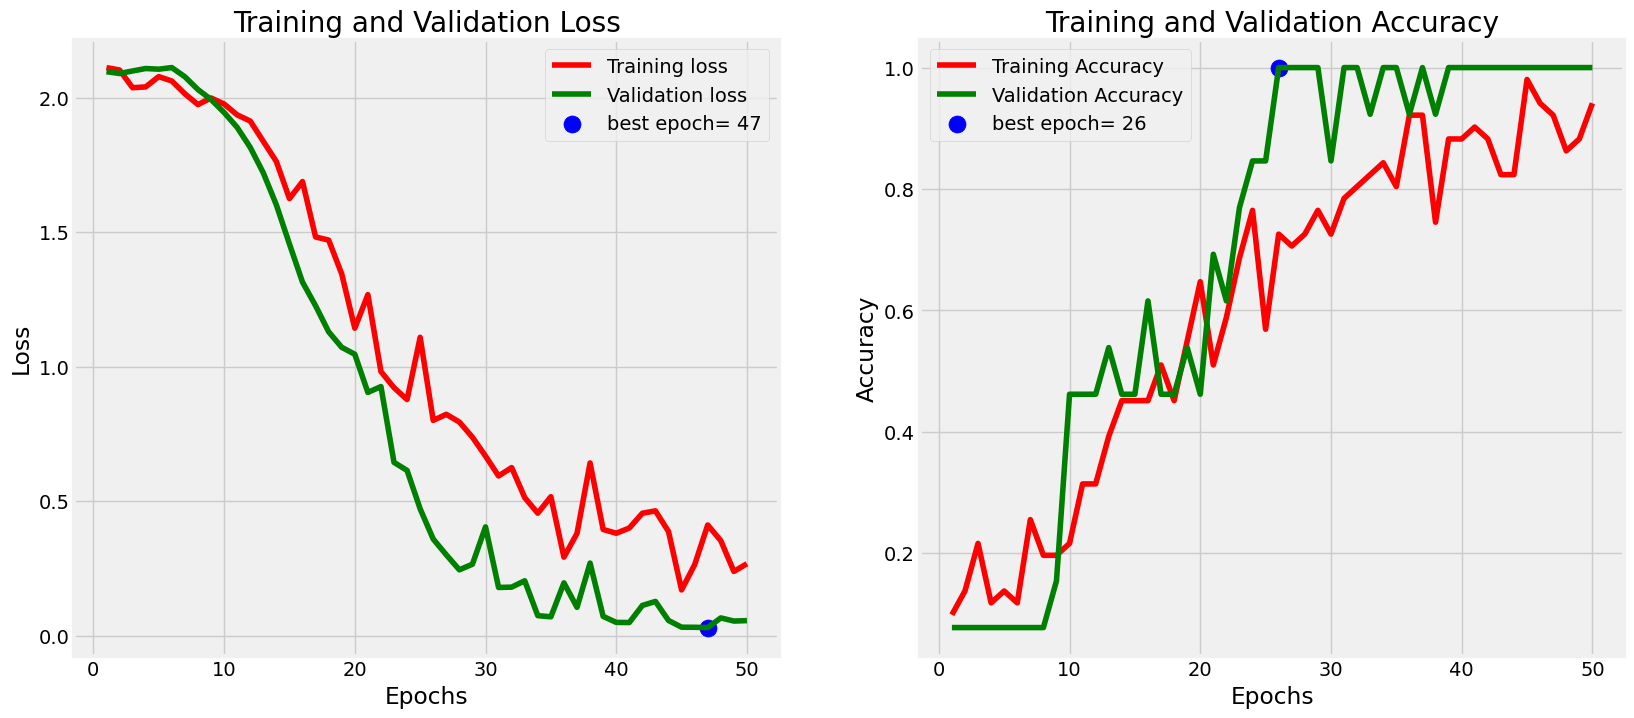

In [23]:
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [24]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

1/1 - 0s - 30ms/step - accuracy: 1.0000 - loss: 0.0556
Test Loss: 0.055585816502571106
Test Accuracy: 1.0


In [25]:
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

print(classification_report(y_test, predicted_labels, target_names=emotions))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
              precision    recall  f1-score   support

       Anger       1.00      1.00      1.00         2
    Contempt       1.00      1.00      1.00         2
     Disgust       1.00      1.00      1.00         1
        Fear       1.00      1.00      1.00         1
       Happy       1.00      1.00      1.00         1
     Neutral       1.00      1.00      1.00         2
         Sad       1.00      1.00      1.00         1
   Surprised       1.00      1.00      1.00         3

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


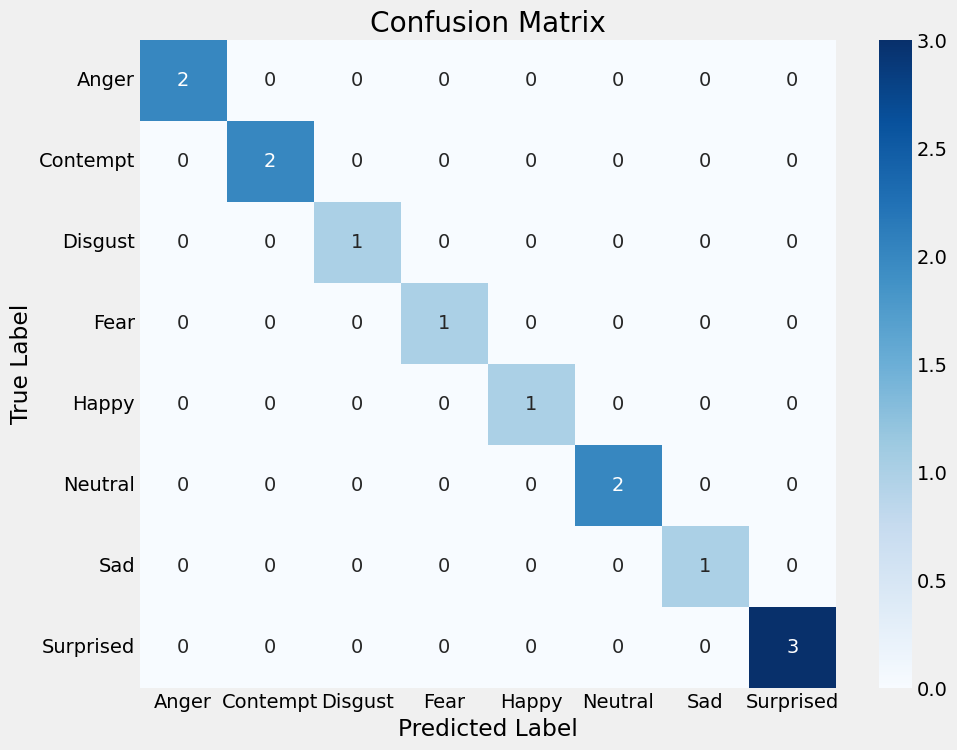

In [26]:
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

cm = confusion_matrix(y_test, predicted_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=emotions, yticklabels=emotions)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


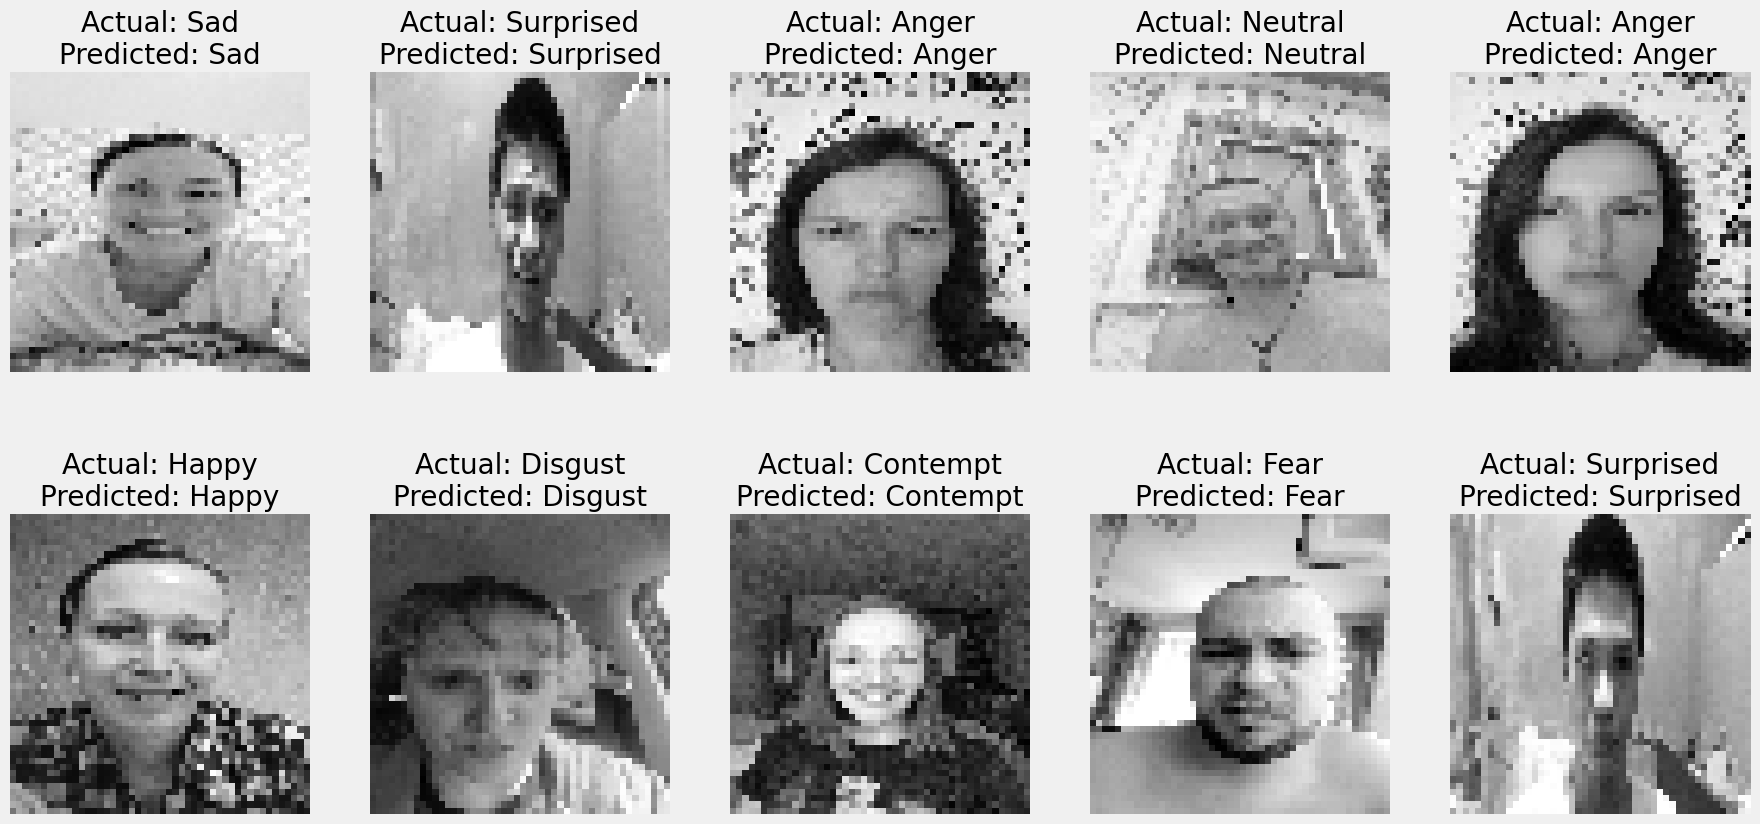

In [27]:
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

def display_images(images, actual_labels, predicted_labels, emotions, num_images=10):
    plt.figure(figsize=(20, 10))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        img = images[i].reshape(img_size, img_size)
        plt.imshow(img, cmap='gray')
        plt.title(f"Actual: {emotions[actual_labels[i]]}\nPredicted: {emotions[predicted_labels[i]]}")
        plt.axis('off')
    plt.show()

display_images(x_test, y_test, predicted_labels, emotions)

In [28]:
model.save('face_recognition_model.keras')